# Setup and Exploration

In [13]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train',
                                     shuffle=True,
                                     random_state=42)

categories=list(newsgroups_train.target_names)
print(categories)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [27]:
print(newsgroups_train.filenames.shape)
print(newsgroups_train.target.shape)

(11314,)
(11314,)


In [25]:
print(type(newsgroups_train.filenames))
print(type(newsgroups_train.target))
print(type(newsgroups_train))
print(newsgroups_train.keys())


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [47]:
print(newsgroups_train.target[:20])

[15  1 17 14  9 16 17  0  2 17  7  9  8  4 17  3 14 19 10  8]


In [6]:
import numpy as np
list(np.unique(newsgroups_train.target))
unique_targets=list(np.unique(newsgroups_train.target))
str_targ=map(str, unique_targets)
print(list(str_targ))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']


In [8]:
print(len(newsgroups_train.data))
print(len(newsgroups_train.filenames))
print(len(newsgroups_train.target_names)) #categories
print(len(newsgroups_train.target))
print(len(newsgroups_train.DESCR))  #like a README

11314
11314
20
11314
9442


In [37]:
print(newsgroups_train.data[0])

From: Christopher.S.Weinberger@williams.edu (Gib)
Subject: Re: Divine providence vs. Murphy's Law
Organization: Williams College, Williamstown, MA
Lines: 21

In article <Apr.19.05.13.28.1993.29224@athos.rutgers.edu> rolfe@junior.dsu.edu (Tim Rolfe) writes:
>Romans 8:28 (RSV)   We know that in everything God works for good with those 
>who love him, who are called according to his purpose. 
>Murphy's Law:  If anything can go wrong, it will.
>We are all quite familiar with the amplifications and commentary on
>Murphy's Law.  But how do we harmonize that with Romans 8:28?  For that
>matter, how appropriate is humor contradicted by Scripture?

	Both Christians and non-Christians laugh at this quote because
it exaggerates something we all feel, but know is not true.  Us
Christians just KNOW that a little better!    :)



			In God we trust!


			-Christopher


			email @ 96csw@williams.edu



In [41]:
print(newsgroups_train.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [44]:
print(newsgroups_train.filenames[:2])


['C:\\Users\\ohass\\scikit_learn_data\\20news_home\\20news-bydate-train\\soc.religion.christian\\20949'
 'C:\\Users\\ohass\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38465']


In [9]:
print(newsgroups_train.keys())


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


# QUESTION 1

'Q1 ANSWER: The categories are generally evenly distributed with most \nhaving between 450 and 600 documents each. The only exception is category 19 (talk.religion.misc)'

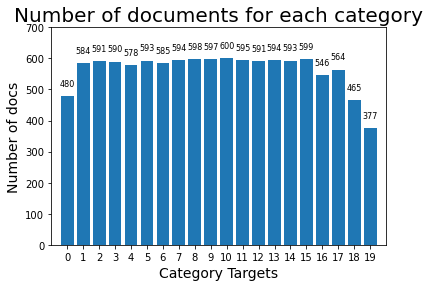

In [10]:
#QUESTION 1: To get started, plot a histogram of the number of training documents for 
#            each of the 20 categories to check if they are evenly distributed.


targets=list(newsgroups_train.target)  #list of all document tagets
cat_count=[]
for n in range(20):    #looping through unique targets (0-19) and getting count
    count = targets.count(n)
    cat_count.append(count)


import matplotlib.pyplot as plt

ucat=range(20)
ucats=map(str,ucat)  #string integers so they're categories in the plot
ucatsl=list(ucats)  

plt.bar(ucatsl, cat_count)
plt.title('Number of documents for each category', fontsize=20)
plt.xlabel('Category Targets', fontsize=14)
plt.ylabel('Number of docs', fontsize=14)
plt.axis([-1,20,0,700])


for x,y in zip(unique_targets,cat_count):
    label = "{:.0f}".format(y)
    plt.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center',
                fontsize=8)
    
    
'''Q1 ANSWER: The categories are generally evenly distributed with most 
having between 450 and 600 documents each. The only exception is category 19 (talk.religion.misc)'''

'Q1 ANSWER: The categories are generally evenly distributed with most \nhaving between 450 and 600 documents each. The only exception is category 19 (talk.religion.misc)'

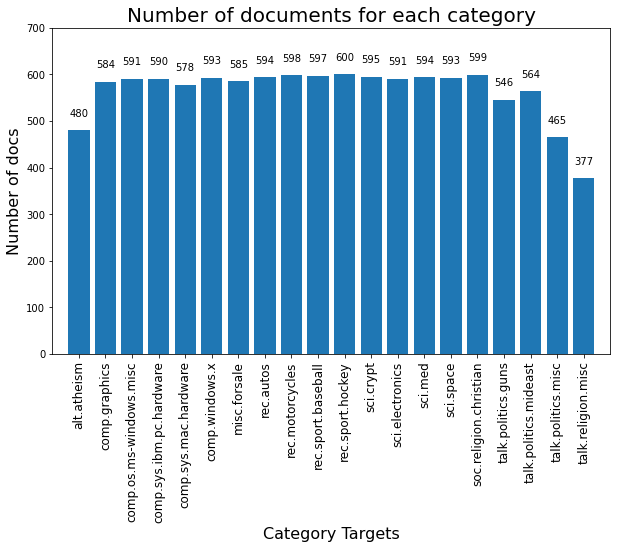

In [14]:
#QUESTION 1: To get started, plot a histogram of the number of training documents for 
#            each of the 20 categories to check if they are evenly distributed.


targets=newsgroups_train.target.tolist()  #list of all document tagets
cat_count=[]
for n in range(20):    #looping through unique targets (0-19) and getting count
    count = targets.count(n)
    cat_count.append(count)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(categories, cat_count)
plt.title('Number of documents for each category', fontsize=20)
plt.xticks(rotation='vertical', fontsize=12)
plt.xlabel('Category Targets', fontsize=16)
plt.ylabel('Number of docs', fontsize=16)
plt.axis([-1,20,0,700])
#plt.tight_layout()


for x,y in zip(categories,cat_count):
    label = "{:.0f}".format(y)
    plt.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(0,14),
                ha='center',
                fontsize=10)
    
    
'''Q1 ANSWER: The categories are generally evenly distributed with most 
having between 450 and 600 documents each. The only exception is category 19 (talk.religion.misc)'''

In [15]:
categories=newsgroups_train.target_names
print(categories)
print(cat_count)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
[480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591, 594, 593, 599, 546, 564, 465, 377]


# Fetching subsets of interest

In [111]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)

In [16]:
q2cats=['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']

train_dataset = fetch_20newsgroups(subset = 'train',
                                   categories = q2cats,
                                   shuffle = True,
                                   random_state = None)
test_dataset = fetch_20newsgroups(subset = 'test',
                                 categories = q2cats,
                                 shuffle = True,
                                 random_state = None)

# Brief Exploration

In [130]:
type(train_dataset)
print(train_dataset.keys())
print(len(train_dataset.target))
print(len(train_dataset.data))

print(len(test_dataset.target))
print(len(test_dataset.data))


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
4732
4732
3150
3150


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

#Exploring effect of min_df & max_df on retained words - train_dataset
min_dfs = range(1,5)
max_dfs = range(100, 1000, 100)
for x in min_dfs:
    count_vect_tmp = CountVectorizer(min_df=x)
    train_tmp = count_vect_tmp.fit_transform(train_dataset.data)
    print('min_df = ', x, ' ', train_tmp.shape)


for x in max_dfs:
    count_vect_tmp = CountVectorizer(min_df=3, max_df=x)
    train_tmp = count_vect_tmp.fit_transform(train_dataset.data)
    print('max_df = ', x, ' ', train_tmp.shape)
    

min_df =  1   (4732, 79218)
min_df =  2   (4732, 30713)
min_df =  3   (4732, 20589)
min_df =  4   (4732, 16035)
max_df =  100   (4732, 19723)
max_df =  200   (4732, 20149)
max_df =  300   (4732, 20308)
max_df =  400   (4732, 20400)
max_df =  500   (4732, 20437)
max_df =  600   (4732, 20464)
max_df =  700   (4732, 20489)
max_df =  800   (4732, 20499)
max_df =  900   (4732, 20508)


# QUESTION 2

In [72]:
#QUESTION 2: Use the following specs to extract features from the textual data:
# -use 'english' stopwords of the CountVectorizer
# -Exclude terms that are numbers
# -Perform lemmatization with nltk.wordnet.WordNetLemmatizer and pos_tag
# -Use min_df=3
# -Report the shape of the TF-IDF matrices of the train and test subsets respectively.

#Custom stop words
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
import nltk
#nltk.download('stopwords')
from string import punctuation

stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')
combined_stopwords = set.union(set(stop_words_en),set(stop_words_skt))

#Build CountVectorizer analyzer
analyzer = CountVectorizer(min_df=3, stop_words=combined_stopwords).build_analyzer()
vectorize = CountVectorizer(min_df=3, stop_words=combined_stopwords)


#check if term is a number
def number_term(t):
    try:
        float(t)
        return True
    except ValueError:
        return False

print(len(stop_words_skt))
print(len(stop_words_en))
print(len(combined_stopwords))

318
179
378


In [38]:
#import stuff for lemmatize
import nltk
import string
from nltk import pos_tag
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet



In [36]:
#morphing penn treebank tags to WordNet
def penn_to_wordnet(ptag):
    tags = {'JJ':'a',
           'NN':'n',
           'VB':'v',
           'RB':'r'}
    try:
        return tags[ptag[:2]]
    except:
        return 'n'
    
#lemmatize single document
def lemfxn(doc):
    wnlem = nltk.wordnet.WordNetLemmatizer()
    lemmatize = []
    for word, tag in pos_tag(nltk.word_tokenize(doc)):
        if(not number_term(word)):  #removing number terms
#            if(word not in string.punctuation):  #removing puctuations
            lemmword = wnlem.lemmatize(word.lower(), pos=penn_to_wordnet(tag))
            lemmatize.append(lemmword) 
    lem_output= ' '.join(lemmatize)
    return lem_output


In [300]:
#fit_transform train_dataset
x=vectorize.fit_transform(train_dataset.data)
x.shape

(4732, 20297)

In [41]:
#testing with sample corpus from discussion
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    "Is this the first document's word?",
]

#combine lemmetize and vectorize
lemlist=[]
for d in corpus:
    lemdoc=lemfxn(d)
    lemlist.append(lemdoc)

lemveclist=vectorize.fit_transform(lemlist)
print(lemveclist.shape)
print(lemveclist.toarray())


(4, 1)
[[1]
 [1]
 [0]
 [1]]


In [320]:
vectorize.get_feature_names() 
#the word 'document' is the only term that passed the lemm and vect filters.
#it appears in the 1st, 2nd and 4th documents.

['document']

In [33]:
#lemmetize set of docs
def lemmdata(doc):
    lemlist=[]
    for d in doc:
        lemdoc=lemfxn(d)  #lemm function
        lemlist.append(lemdoc)  #build lemmatized doc list
    return lemlist

In [44]:
#vectorize lemmetized documents
lemvectrain=vectorize.fit_transform(lemmdata(train_dataset.data))
lemvectest=vectorize.transform(lemmdata(test_dataset.data))

print(lemvectrain.shape)
print(lemvectest.shape)

(4732, 17389)
(3150, 17389)


In [18]:
'''Question 2 Answer: 
-elected not to use max_df since most high-repeat words would be included in the stop words list
-for stop words, used a combination of 'english' from nltk and text.ENGLISH_STOP_WORDS from sklearn.
    this yielded a combined stop word list of 471 stop words. 
-adding punctuations to the stop words did not affect the dimensions of the data sets so it was left off.
-Number of terms without lemmatizing: (4732, 20297)

The train dataset has dimensions of 4732 x 17389. 
i.e. 4732 documents (as expected) and 17389 terms after lemmatizing and vectorizing with given parameters.

The test dataset has dimensions of 3150 x 17389. 
i.e. 3150 documents (as expected) and 17389 terms (also as expected) after lemmatizing and vectorizing with given parameters.

It makes sense that the number of terms is the same in the 2 data sets as it is the same set of feature terms '''

"Question 2 Answer: \n-elected not to use max_df since most high-repeat words would be included in the stop words list\n-for stop words, used a combination of 'english' from nltk and text.ENGLISH_STOP_WORDS from sklearn.\n    this yielded a combined stop word list of 471 stop words. \n-adding punctuations to the stop words did not affect the dimensions of the data sets so it was left off.\n\nThe train dataset has dimensions of 4732 x 17389. \ni.e. 4732 documents (as expected) and 17389 terms after lemmatizing and vectorizing with given parameters.\n\nThe test dataset has dimensions of 3150 x 17389. \ni.e. 3150 documents (as expected) and 17389 terms (also as expected) after lemmatizing and vectorizing with given parameters.\n\nIt makes sense that the number of terms is the same in the 2 data sets as it is the same set of feature terms "

In [20]:
#print(lemvectrain.toarray()[:30,:10])
#print('*'*50)
#print(lemvectest.toarray()[:30,:10])

In [43]:
#applying the tf-idf transformer to both datasets

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

train_tfidf = tfidf_transformer.fit_transform(lemvectrain)
test_tfidf = tfidf_transformer.transform(lemvectest)

#print('Shape of TF-IDF train martix: ', train_tfidf.shape)
#print('Shape of TF-IDF test martix: ', test_tfidf.shape)
#print('-' * 50)
#print(train_tfidf.toarray()[:30,:10])
#print(test_tfidf.toarray()[:30,:10])
#

# Question 3

In [67]:
#QUESTION 3: Reduce the dimensionality of the data using the methods above
#-Apply LSI to the TF-IDF matrix corresponding to the 8 categories with k = 50; so each
#  document is mapped to a 50-dimensional vector.
#- Also reduce dimensionality through NMF (k = 50) and compare with LSI
# WHICH ONE IS LARGER, ||X-WH||^2_F IN NMF OR THE ||X-U_k*SIG_k*V^T_k||^2_F IN LSI?

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.utils.extmath import randomized_svd

#LSI
svd = TruncatedSVD(n_components=50, random_state=42)
lsi_train = svd.fit_transform(train_tfidf)
lsi_test = svd.transform(test_tfidf)
U,S,Vt = randomized_svd(train_tfidf, n_components=50, random_state = 42) #left/right singular matrices & singular values
SIG = np.diag(S)
lsi_err = np.sum(np.array(train_tfidf - U.dot(SIG).dot(Vt))**2)  #||X-U_k*SIG_k*V^T_k||^2_F


#NMF
nmf = NMF(n_components = 50, init = 'random', random_state = 42)
nmf_train = nmf.fit_transform(train_tfidf)
nmf_test = nmf.transform(test_tfidf)
H = nmf.components_
nmf_err = np.sum(np.array(train_tfidf - nmf_train.dot(H))**2)  #||X-WH||^2_F

print('LSI error =', lsi_err)
print('NMF error =', nmf_err)


C:\Users\ohass\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


LSI error = 4115.611722607067
NMF error = 4154.770111825831


In [403]:
print(len(lsi_train))
print(len(lsi_test))
print(len(nmf_train))
print(len(nmf_test))

4732
3150
4732
3150


In [ ]:
'''QUESTION 3 RESPONSE: NMF error ||X-WH||2F is larger than the LSI error ||X - UkΣkVTk||2F . The added constraints in NMF dimensionality reduction of non-negative W & H restrict the search domain. LSI, having no such restrictions, can better minimize the error.
...'''

# Question 12

In [92]:
'''QUESTION 12:
In this part, we aim to learn classifiers on the documents belonging to the classes:
comp.sys.ibm.pc.hardware,
comp.sys.mac.hardware,
misc.forsale, 
soc.religion.christian

Perform Na¨ıve Bayes classification and multiclass SVM classification (with both One VS One and
One VS the rest methods described above) and report the confusion matrix and calculate the
accuracy, recall, precision and F-1 score of your classifiers.


'''


q12cat = [
'comp.sys.ibm.pc.hardware',
'comp.sys.mac.hardware',
'misc.forsale', 
'soc.religion.christian']

q12class = [
    'IBM HW',
    'MAC HW',
    'Forsale',
    'Christianity']

q12trainds = fetch_20newsgroups(subset= 'train', categories = q12cat, shuffle = True, random_state = 42)
q12testds = fetch_20newsgroups(subset= 'test', categories = q12cat, shuffle = True, random_state = 42)

q12lemvectrain=vectorize.fit_transform(lemmdata(q12trainds.data))
q12lemvectest=vectorize.transform(lemmdata(q12testds.data))


In [62]:
q12trn_tfidf = tfidf_transformer.fit_transform(q12lemvectrain)
q12tst_tfidf = tfidf_transformer.transform(q12lemvectest)
print(q12trn_tfidf.shape)
print(q12tst_tfidf.shape)

(2352, 8834)
(1565, 8834)


In [74]:
#LSI
svd = TruncatedSVD(n_components=50, random_state=42)
lsi_train = svd.fit_transform(q12trn_tfidf)
lsi_test = svd.transform(q12tst_tfidf)
#U,S,Vt = randomized_svd(q12trn_tfidf, n_components=50, random_state = 42) #left/right singular matrices & singular values
#SIG = np.diag(S)
#lsi_err = np.sum(np.array(q12trn_tfidf - U.dot(SIG).dot(Vt))**2)  #||X-U_k*SIG_k*V^T_k||^2_F
#print(lsi_err)

#Pulling Targets
q12tr_targ = q12trainds.target
q12ts_targ = q12testds.target

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc


def print_classifier_metrics(y_test,y_pred,name="",average='binary'):
    print("Accuracy score for %s: %f" %(name,accuracy_score(y_test,y_pred)))
    print("Recall score for %s: %f" % (name,recall_score(y_test,y_pred,average=average)))
    print("Precision score for %s: %f" % (name,precision_score(y_test,y_pred,average=average)))
    print("F-1 score for %s: %f" % (name,f1_score(y_test,y_pred,average=average)))

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

In [80]:
#GNB 
from sklearn.naive_bayes import GaussianNB

X_train_LSI=lsi_train
X_test_LSI=lsi_test
y_train = q12tr_targ
y_test = q12ts_targ

GNB = GaussianNB()
y_pred_GNB = GNB.fit(X_train_LSI, y_train).predict(X_test_LSI)
print_classifier_metrics(y_test, y_pred_GNB, average='weighted', name="Multiclass GNB")

Accuracy score for Multiclass GNB: 0.692013
Recall score for Multiclass GNB: 0.692013
Precision score for Multiclass GNB: 0.703850
F-1 score for Multiclass GNB: 0.685141


Confusion matrix, Multiclass Gaussian Naive Bayes
[[244  39 106   3]
 [107 153 121   4]
 [ 44  39 304   3]
 [  1   0  15 382]]
Normalized Confusion matrix, Multiclass Gaussian Naive Bayes
[[0.62244898 0.0994898  0.27040816 0.00765306]
 [0.27792208 0.3974026  0.31428571 0.01038961]
 [0.11282051 0.1        0.77948718 0.00769231]
 [0.00251256 0.         0.03768844 0.95979899]]


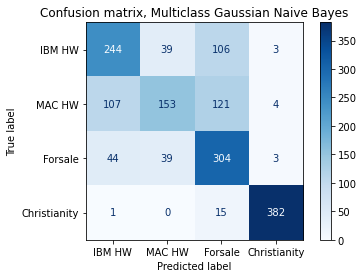

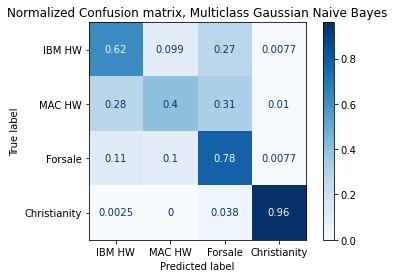

In [97]:
from sklearn.metrics import plot_confusion_matrix

gnb_conf_matrix = confusion_matrix(y_test,y_pred_GNB)

class_names = q12class
classifier = GNB

# Plot confusion matrix
titles_options = [("Confusion matrix, Multiclass Gaussian Naive Bayes", None),
                  ("Normalized Confusion matrix, Multiclass Gaussian Naive Bayes", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test_LSI, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [153]:
#SVM One vs. One
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import itertools




x = {'estimator__C':[0.001,0.01,0.1,1,10,100,1000]} #gamma parameters in Linear SVC
svm_1v1 = OneVsOneClassifier(LinearSVC(random_state = 42)) #1v1 classifier for SVM
gsg_1v1 = GridSearchCV(svm_1v1,x,cv=5,scoring='accuracy') #best gamma grid search
y_pred_1v1 = gsg_1v1.fit(X_train_LSI, y_train).best_estimator_.predict(X_test_LSI) 
print(gammas_1v1.best_estimator_) #best estimator: C=10
print_classifier_metrics(y_test,y_pred_1v1,name="One vs One SVM",average='weighted')


C:\Users\ohass\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

OneVsOneClassifier(estimator=LinearSVC(C=10, random_state=42))
Accuracy score for One vs One SVM: 0.882428
Recall score for One vs One SVM: 0.882428
Precision score for One vs One SVM: 0.882771
F-1 score for One vs One SVM: 0.882558


C:\Users\ohass\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [162]:
svm_fit = svm_1v1.fit(X_train_LSI, y_train)
print(type(svm_fit))


<class 'sklearn.multiclass.OneVsOneClassifier'>


In [163]:
svm1v1_conf_matrix = confusion_matrix(y_test,y_pred_1v1)

class_names = q12class
classifier = svm_fit

# Plot confusion matrix
titles_options = [("Confusion matrix, Multiclass SVM 1 vs 1", None),
                  ("Normalized Confusion matrix, Multiclass Multiclass SVM 1 vs 1", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier,
                                 y_pred_1v1, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[2 1 1 ... 1 2 3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.